# Module 6.2 — Rolling Window Instability

We continue using the same IID Gaussian return process.

Objective:
To study how evaluation window length affects the stability of performance estimates.

We compute:
- Full-sample expectancy
- 20-period rolling expectancy
- 50-period rolling expectancy
- 100-period rolling expectancy

Key Question:
How much instability is introduced purely by small sample sizes?

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
#np.random.seed(42)
n = 1000
mu = 0.001
sigma = 0.02

returns = np.random.normal(mu, sigma, n)
df = pd.DataFrame({
    'returns': returns
})

## Full-Sample Expectancy

In [83]:
full_sample_expectancy = df['returns'].mean()
print("Full Sample Expectancy:", round(full_sample_expectancy, 6))

Full Sample Expectancy: 1.5e-05


## Rolling-Expectancy

In [84]:
df['roll_20'] = df['returns'].rolling(20).mean()
df['roll_50'] = df['returns'].rolling(50).mean()
df['roll_100'] = df['returns'].rolling(100).mean()

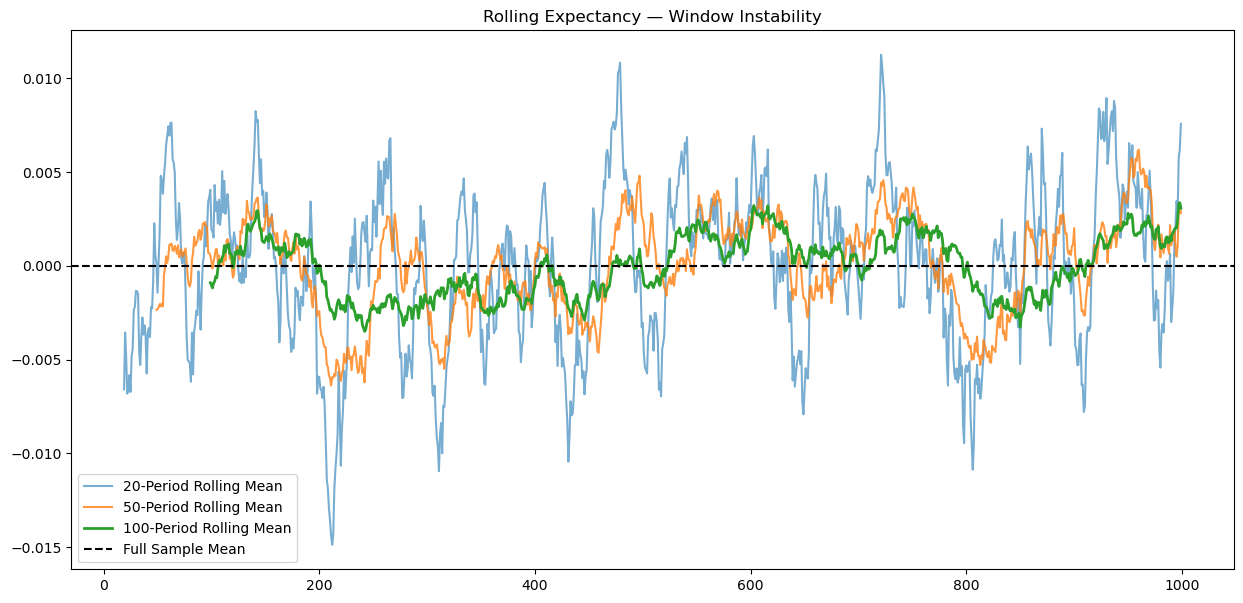

In [85]:
plt.figure(figsize=(15,7))

plt.plot(df['roll_20'], label='20-Period Rolling Mean', alpha=0.6)
plt.plot(df['roll_50'], label='50-Period Rolling Mean', alpha=0.8)
plt.plot(df['roll_100'], label='100-Period Rolling Mean', linewidth=2)
plt.axhline(full_sample_expectancy, color='black', linestyle='--', label='Full Sample Mean')

plt.title("Rolling Expectancy — Window Instability")
plt.legend()
plt.show()

# Compare Volatility Estimates

In [86]:
print("Std Dev of 20-Period Rolling Mean:", round(df['roll_20'].std(), 6))
print("Std Dev of 50-Period Rolling Mean:", round(df['roll_50'].std(), 6))
print("Std Dev of 100-Period Rolling Mean:", round(df['roll_100'].std(), 6))

Std Dev of 20-Period Rolling Mean: 0.004218
Std Dev of 50-Period Rolling Mean: 0.002509
Std Dev of 100-Period Rolling Mean: 0.001626


## Observations

1. Short rolling windows (20 periods) show large fluctuations around the true expectancy.
2. Medium windows (50 periods) reduce dispersion but remain unstable.
3. Longer windows (100 periods) begin to stabilize toward the full-sample mean.
4. The underlying process is constant and IID — instability arises purely from small sample sizes.

#### Conclusion:
Small evaluation windows exaggerate performance shifts and can create false regime illusions.
Stability emerges as the window length increases due to the Law of Large Numbers.

Even though the underlying process has a constant true mean (μ), rolling estimates fluctuate significantly due to sampling variability.    
The true edge is not directly observable — it can only be estimated.    
Small sample sizes produce high estimation error, which can create false impressions of regime shifts or edge deterioration.   

The stability of rolling expectancy depends on the signal-to-noise ratio (μ / σ).    
When the true edge (μ) is small relative to volatility (σ), short rolling windows will frequently appear unstable or even negative.  
Increasing window length reduces estimation error at a rate proportional to 1/√n.   